# Import Libraries

# Step 1 : importing Essential Libraries

In [4]:
pip install seaborn

     -------------------------------------- 294.9/294.9 kB 9.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
from glob import glob
from PIL import Image

In [3]:
import tensorflow
#print("TensorFlow version:", tensorflow.__version__)

In [4]:
import keras
#print("keras version:", keras.__version__)

In [5]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.models import load_model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 2 : Reading & EDA

In [7]:
# Set a seed for reproducibility
np.random.seed(42)
# Load the dataset
skin_df = pd.read_csv("D:\Arun\Final Project\Dataset\HAM10000_metadata.csv")
SIZE=32

In [8]:
print(skin_df.head())

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


# In this step we check for Missing values and datatype of each field

In [9]:
print(skin_df.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


As it is evident from the above that only age has null values which is 57 so we will fill the null values by their mean.

In [10]:
skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)

C:\Users\arunk\AppData\Local\Temp\ipykernel_3004\3479505362.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  skin_df['age'].fillna((skin_df['age'].mean()), inplace=True)


In [11]:
print(skin_df.isnull().sum())

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64


In [12]:
print(skin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB
None


In [14]:
print(skin_df.describe(include='all'))

          lesion_id      image_id     dx dx_type           age    sex  \
count         10015         10015  10015   10015  10015.000000  10015   
unique         7470         10015      7       4           NaN      3   
top     HAM_0003789  ISIC_0027419     nv   histo           NaN   male   
freq              6             1   6705    5340           NaN   5406   
mean            NaN           NaN    NaN     NaN     51.863828    NaN   
std             NaN           NaN    NaN     NaN     16.920252    NaN   
min             NaN           NaN    NaN     NaN      0.000000    NaN   
25%             NaN           NaN    NaN     NaN     40.000000    NaN   
50%             NaN           NaN    NaN     NaN     50.000000    NaN   
75%             NaN           NaN    NaN     NaN     65.000000    NaN   
max             NaN           NaN    NaN     NaN     85.000000    NaN   

       localization  
count         10015  
unique           15  
top            back  
freq           2192  
mean         

In this we will explore different features of the dataset , their distrubtions and actual counts
Plot to see distribution of 7 different classes of cell type

Its seems from the above plot that in this dataset cell type Melanecytic nevi has very large number of instances in comparison to other cell types.

Plotting of Technical Validation field (ground truth) which is dx_type to see the distribution of its 4 categories which are listed below :
1. Histopathology(Histo): Histopathologic diagnoses of excised lesions have been performed by specialized dermatopathologists.
2. Confocal: Reflectance confocal microscopy is an in-vivo imaging technique with a resolution at near-cellular level , and some facial benign with a grey-world assumption of all training-set images in Lab-color space before and after manual histogram changes.
3. Follow-up: If nevi monitored by digital dermatoscopy did not show any changes during 3 follow-up visits or 1.5 years biologists accepted this as evidence of biologic benignity. Only nevi, but no other benign diagnoses were labeled with this type of ground-truth because dermatologists usually do not monitor dermatofibromas, seborrheic keratoses, or vascular lesions.
4. Consensus: For typical benign cases without histopathology or followup biologists provide an expert-consensus rating of authors PT and HK. They applied the consensus label only if both authors independently gave the same unequivocal benign diagnosis. Lesions with this type of groundtruth were usually photographed for educational reasons and did not need further follow-up or biopsy for confirmation.

<Axes: xlabel='dx_type'>

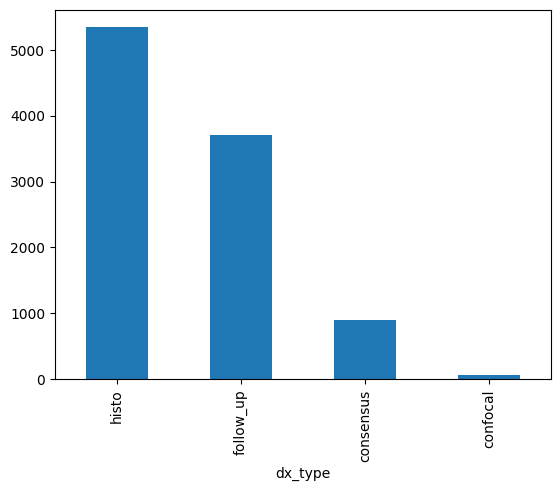

In [17]:
skin_df['dx_type'].value_counts().plot(kind='bar')

Plotting the distribution of localization field

It seems back , lower extremity,trunk and upper extremity are heavily compromised regions of skin cancer

Now, check the distribution of Age

It seems that there are larger instances of patients having age from 30 to 60

Lets see the distribution of males and females

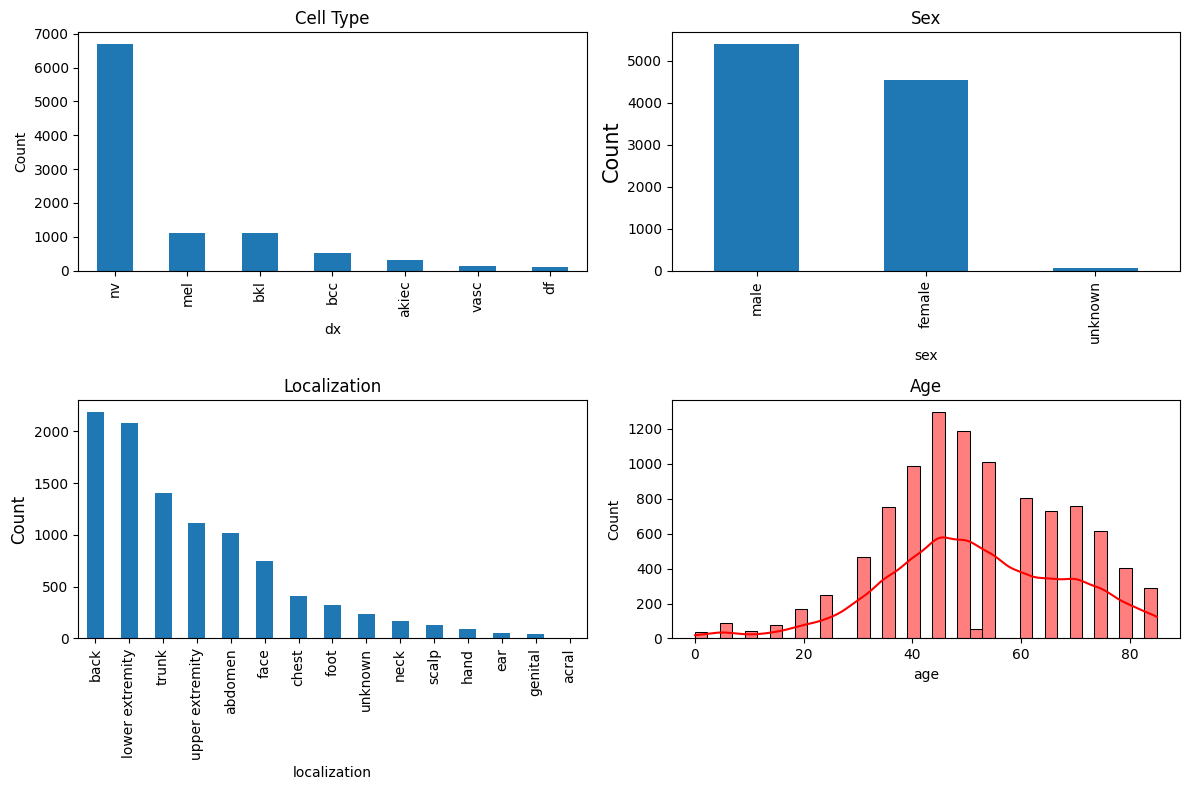

In [23]:
# Plotting distribution of cell types, sex, localization, and age
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.histplot(sample_age['age'], kde=True, color='red', ax=ax4);
ax4.set_title('Age')

plt.tight_layout()
plt.show()

Step 9 : Label Encoding
Labels are 7 different classes of skin cancer types from 0 to 6. We need to encode these lables to one hot vectors

# Data Preprocessing
# Step 3 : Label Encoding
Labels are 7 different classes of skin cancer types from 0 to 6. We need to encode these lables to one hot vectors

In [21]:
# Encode labels using LabelEncoder
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [22]:
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))

        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extremity      5  
8984  lower extremity      5  
2310 

# check weather the data is balanced or not

In [24]:
from sklearn.utils import resample
print(skin_df['label'].value_counts())

label
5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: count, dtype: int64


In [25]:
# Labeling
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

set  the data which is inn each case as 1500 for  better prediction

In [26]:
# Upsample the minority class to balance the dataset
n_samples=1500 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [28]:
# Combine the balanced dataframes
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [29]:
skin_df_balanced['label'].value_counts()

label
0    1500
1    1500
2    1500
3    1500
4    1500
5    1500
6    1500
Name: count, dtype: int64

In the below step we have read the csv by joining the path of image folder which is the base folder where all the images are placed named base_skin_dir. After that we made some new columns which is easily understood for later reference such as we have made column path which contains the image_id, cell_type which contains the short name of lesion type and at last we have made the categorical column cell_type_idx in which we have categorize the lesion type in to codes from 0 to 6

In [33]:
# Folder containing the images
image_folder = "D:\Arun\Final Project\Dataset\HAM10000_images"

# Dictionary to map image IDs to file paths
image_paths = {}

# Iterate through the files in the folder
for filename in os.listdir(image_folder):
    # Assuming the filename without extension is the image ID
    image_id = os.path.splitext(filename)[0]
    # Construct the full file path
    file_path = os.path.join(image_folder, filename)
    # Add the mapping to the dictionary
    image_paths[image_id] = file_path

# Example usage:
# Accessing file path for image with ID "image1"
#print("File path for image1:", image_paths["image1"])


In [34]:
# Create a dictionary to map image IDs to file paths
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('/kaggle/input/skin-cancer-mnist-ham10000', '*', '*.jpg'))}

In [35]:
# Add 'path' and 'image' columns to the balanced dataframe
skin_df_balanced['path'] = skin_df['image_id'].map(image_paths.get)

In [36]:
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

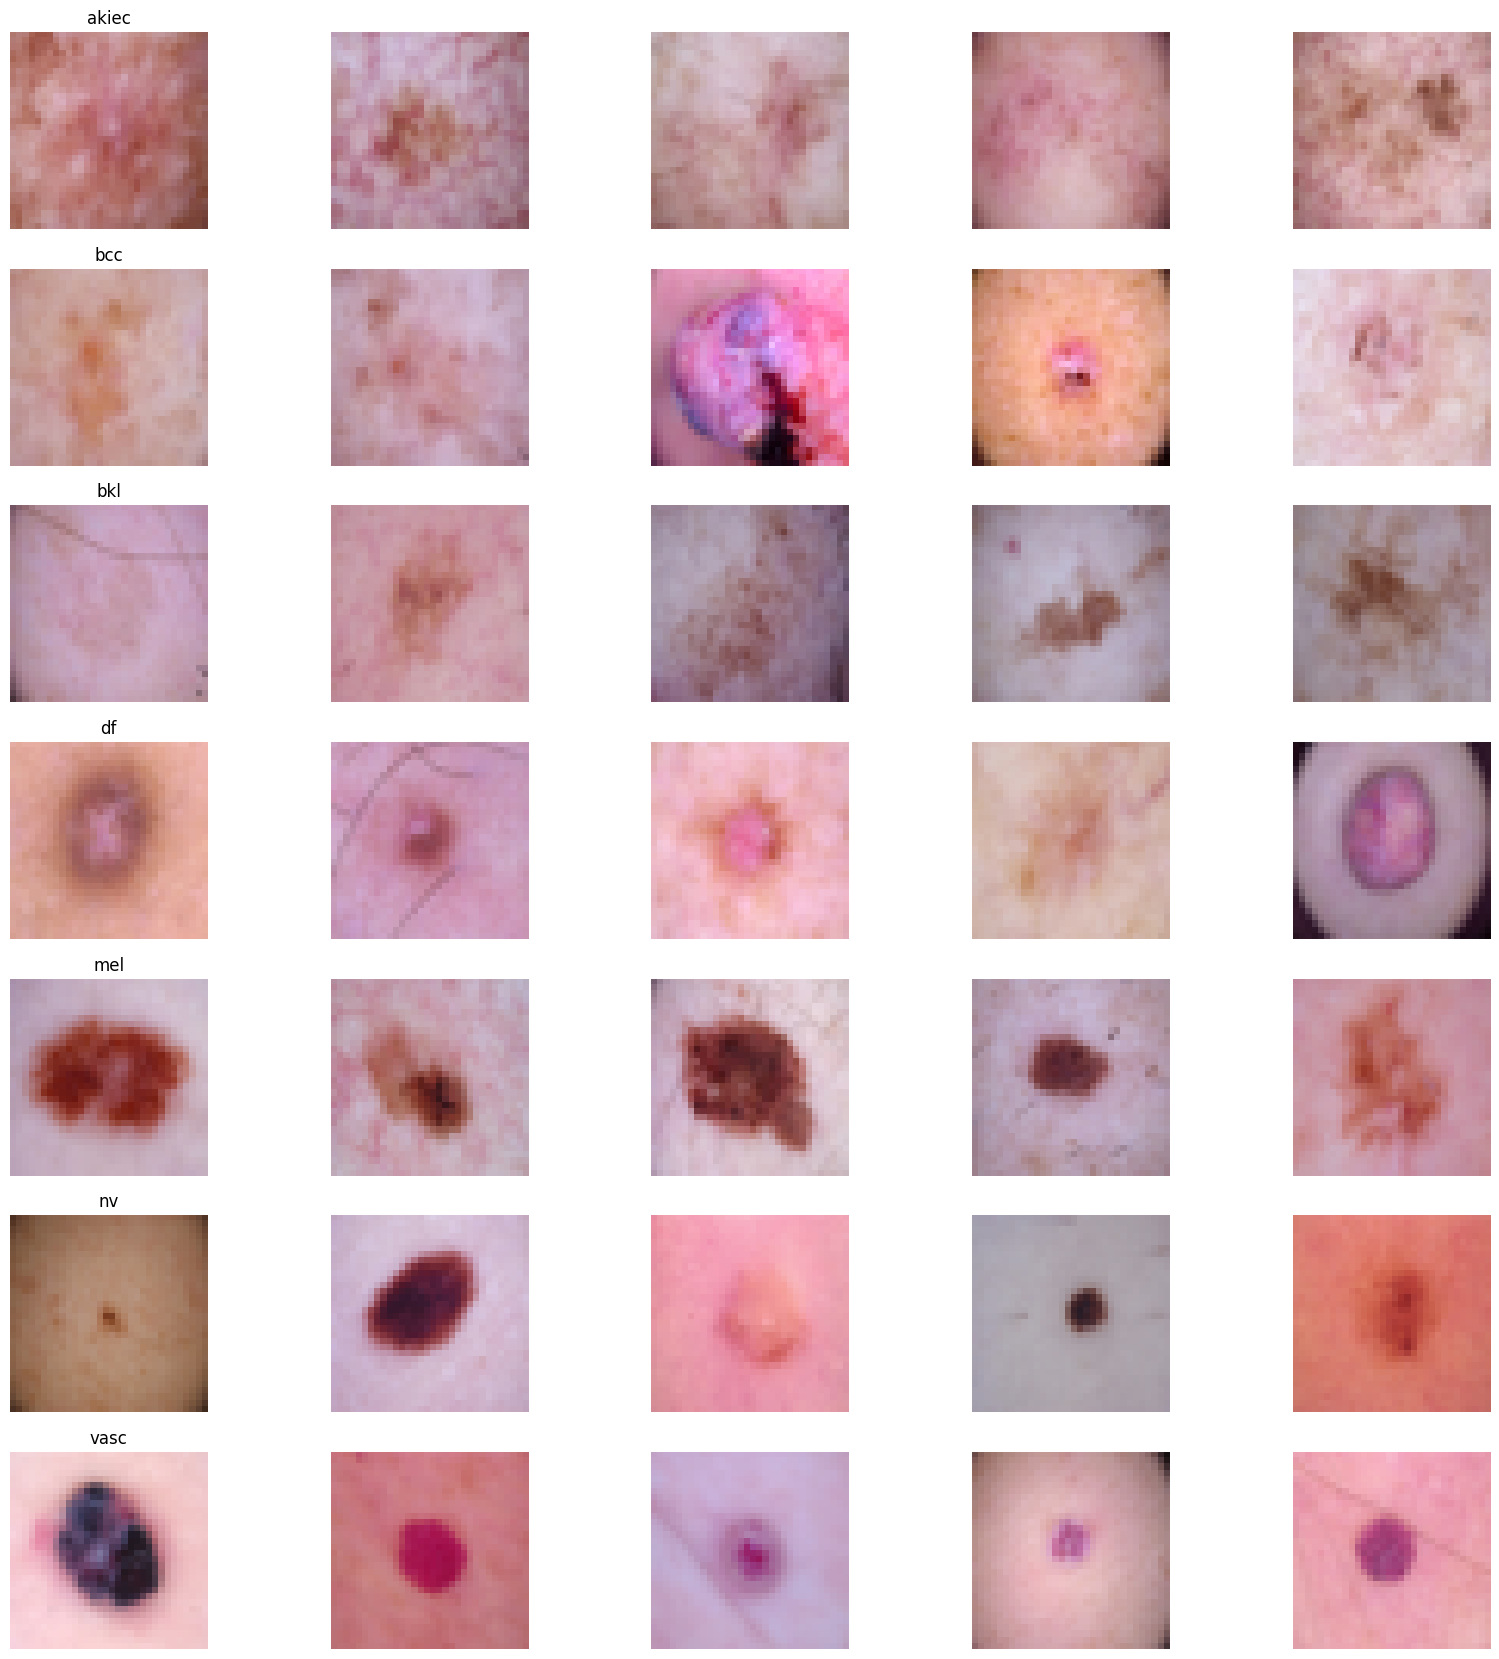

In [37]:
n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

Normalization
I choosed to normalize the x_train, x_test by substracting from theor mean values and then dividing by thier standard deviation.

In [38]:
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1. 
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7)

Train Test Split¶
In this step we have splitted the dataset into training and testing set of 75:25 ratio

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=32)

## ANN

# Model Building
CNN
I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the Dense layer. It is like a set of learnable filters. I choosed to set 256 filters for 2nd Dense layers is 128 filters, 64 filters for the 3rd Dense layer and 32 filters for 4th layers. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. This drops randomly a propotion of the network and forces the network to learn features in a distributed way. This technique also improves generalization and reduces the overfitting.

'relu' is the rectifier activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

In [40]:
num_classes = 7
model_cnn = Sequential()
model_cnn.add(Dense(256, input_shape=(SIZE, SIZE, 3), activation='relu'))
model_cnn.add(Dense(128, activation='tanh'))
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dropout(0.1))
model_cnn.add(Flatten())
model_cnn.add(Dense(num_classes, activation='softmax'))
model_cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 256)       1024      
                                                                 
 dense_1 (Dense)             (None, 32, 32, 128)       32896     
                                                                 
 dense_2 (Dense)             (None, 32, 32, 64)        8256      
                                                                 
 dense_3 (Dense)             (None, 32, 32, 32)        2080      
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 7)                 

# Setting Optimizer and Annealer¶
Once our layers are added to the model, we need to set up a score function, a loss function and an optimisation algorithm. We define the loss function to measure how poorly our model performs on images with known labels. It is the error rate between the oberved labels and the predicted ones. We use a specific form for categorical classifications (>2 classes) called the "categorical_crossentropy". The most important function is the optimizer. This function will iteratively improve parameters (filters kernel values, weights and bias of neurons ...) in order to minimise the loss. I choosed Adam optimizer because it combines the advantages of two other extensions of stochastic gradient descent. Specifically:

Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients 

Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

Adam realizes the benefits of both AdaGrad and RMSProp.

Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

The metric function "accuracy" is used is to evaluate the performance our model. This metric function is similar to the loss function, except that the results from the metric evaluation are not used when training the model (only for evaluation).

In [41]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# train the model

In [42]:
# Train the model
batch_size = 12
epochs = 25

history_ann = model_cnn.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2
)

Epoch 1/25


657/657 - 31s - loss: 1.5362 - acc: 0.3966 - val_loss: 1.2154 - val_acc: 0.5265 - 31s/epoch - 48ms/step
Epoch 2/25
657/657 - 27s - loss: 1.0891 - acc: 0.6046 - val_loss: 0.9610 - val_acc: 0.6579 - 27s/epoch - 42ms/step
Epoch 3/25
657/657 - 27s - loss: 0.8155 - acc: 0.7128 - val_loss: 0.7985 - val_acc: 0.7280 - 27s/epoch - 42ms/step
Epoch 4/25
657/657 - 28s - loss: 0.6226 - acc: 0.7860 - val_loss: 0.6283 - val_acc: 0.7996 - 28s/epoch - 42ms/step
Epoch 5/25
657/657 - 28s - loss: 0.4940 - acc: 0.8307 - val_loss: 0.5945 - val_acc: 0.8095 - 28s/epoch - 42ms/step
Epoch 6/25
657/657 - 28s - loss: 0.3994 - acc: 0.8672 - val_loss: 0.5391 - val_acc: 0.8484 - 28s/epoch - 42ms/step
Epoch 7/25
657/657 - 27s - loss: 0.3508 - acc: 0.8874 - val_loss: 0.5580 - val_acc: 0.8438 - 27s/epoch - 42ms/step
Epoch 8/25
657/657 - 27s - loss: 0.2889 - acc: 0.9062 - val_loss: 0.5370 - val_acc: 0.8613 - 27s/epoch - 42ms/step
Epoch 9/25
657/657 - 27s - loss: 0.2407 - acc: 0.9228 - val_loss: 0.6818 - val

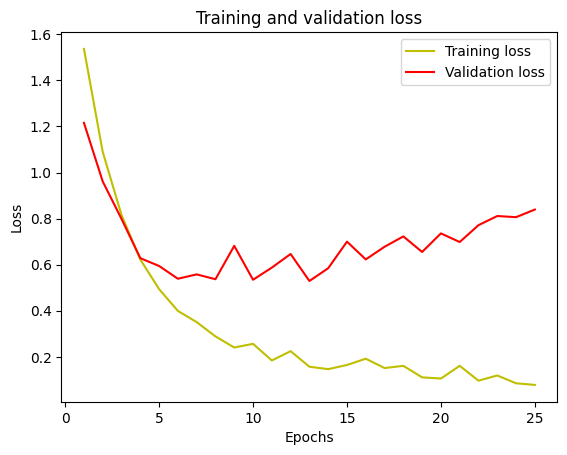

In [43]:
loss = history_ann.history['loss']
val_loss = history_ann.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

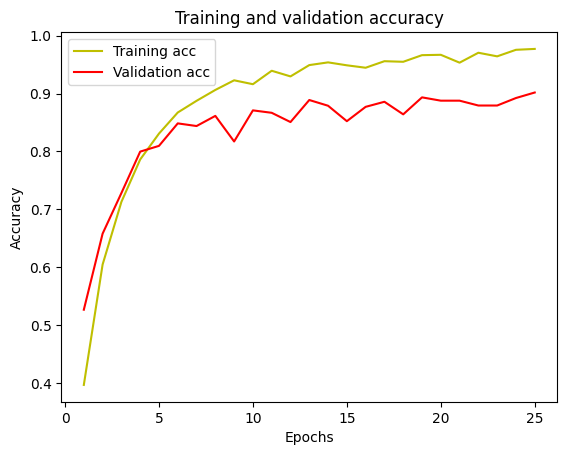

In [44]:
acc = history_ann.history['acc']
val_acc = history_ann.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
# Prediction on test data
y_pred = model_cnn.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)

83/83 [==============================] - 4s 50ms/step


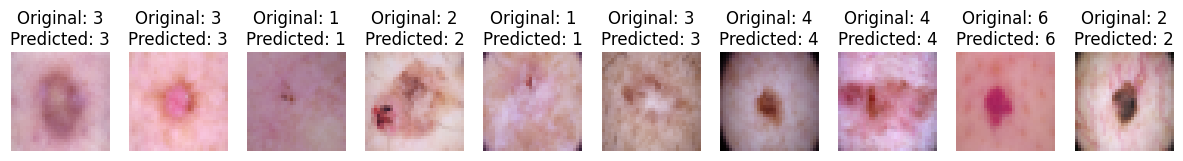

In [46]:
n_samples_to_display = 10
# Get random indices
random_indices = np.random.choice(range(len(x_test)), size=n_samples_to_display, replace=False)

# Plot the images
plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, n_samples_to_display, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f'Original: {np.argmax(y_test[idx])}\nPredicted: {y_pred_classes[idx]}')
    plt.axis('off')

plt.show()

In [40]:
model_file_name = 'skin_model.h5'
save_dir = "C:/Users/arunk/Downloads" 

os.makedirs(save_dir,exist_ok=True)

save_path = os.path.join(save_dir,model_file_name)

model_cnn.save(save_path)

c:\Users\arunk\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
